In [54]:
CLEANED_SAVE_PATH = "../cleaned_tweet_data.csv"

In [55]:
import pandas as pd
from wordcloud import STOPWORDS,WordCloud

In [56]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    
    except FileNotFoundError:
        print("file not found")

In [57]:
df = read_proccessed_data(CLEANED_SAVE_PATH)

file read as csv


In [58]:
# inspecting the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  friends_count       6532 non-null   float64
 16  clean_

In [59]:
# inspecting the polarity column
df['polarity']
df['polarity'].value_counts()


 0.000000    1829
-0.750000     501
 0.500000     210
 0.133333     201
 0.337500     189
             ... 
-0.190625       1
-0.035714       1
-0.175000       1
 0.186111       1
-0.055556       1
Name: polarity, Length: 401, dtype: int64

In [60]:
# checking if there are null values
text_null_sum = df['clean_text'].isnull().sum()
polarity_null_sum = df['polarity'].isnull().sum()

print(f'sum of null values in clean_text column: {text_null_sum}')
print(f'sum of null values in polarity cloumn: {polarity_null_sum}')

sum of null values in clean_text column: 0
sum of null values in polarity cloumn: 0


In [61]:
# creating cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns=['clean_text','polarity'])

cleanedTweet['clean_text'] = df['clean_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace=True)

In [62]:
cleanedTweet

,clean_text,polarity
0,"🚨africa is ""in the midst of a full-blown third...",0.166667
1,"dr moeti is head of who in africa, and one of ...",0.133333
2,thank you for creating this amazing campaign ...,0.316667
3,"former pfizer vp and virologist, dr. michael y...",0.086111
4,i think it’s important that we don’t sell cova...,0.280000
...,...,...
6527,rt : zweli please just release the graphic des...,0.000000
6528,"former pfizer vp and virologist, dr. michael y...",0.086111
6529,"respectfully, veterinarians have to have a b...",0.281250
6530,"""africa needs millions more doses here &amp; n...",0.125000


In [63]:
# takes polarity and returns a string either postive, negative or neutral

def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

In [64]:
# creating score column by applying text_category
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()

positive    3426
neutral     1829
negative    1277
Name: score, dtype: int64

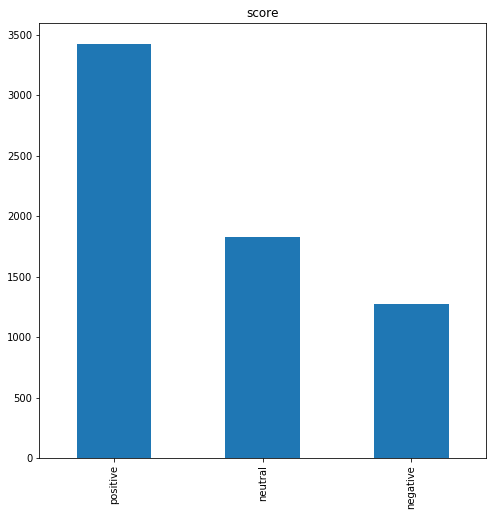

In [65]:
# Grouping the scores and plotting bar graph
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

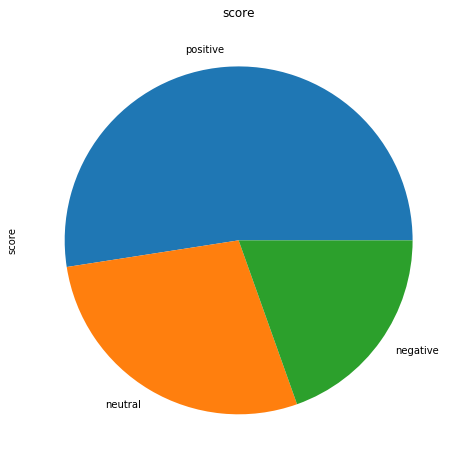

In [66]:
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[8, 8])


In [67]:
# takes a string and returns if a value is "neutral"
def remove_neutral(value):
    return value != "neutral"

In [68]:
# creating score_map column
# we remove all rows that have neutral score
# then create a score_map. if score is "positive" it has value 1 else 0

cleanedTweet = cleanedTweet[cleanedTweet['score'].map(remove_neutral)]
cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)

/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [70]:
# separating our input and output
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score_map']

In [71]:
# creating CountVectorizer and fitting it
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [72]:
# creating a tri_gram Vector representation for X
X_trigram = trigram_vectorizer.transform(X.values)

In [73]:
# creating a trigram tfidf transformer
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [74]:
# creating a tfidf representation of x
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [75]:
# takes input as X, and ouput as Y, title of model as title
# split the input to train and valid
# use Stochastic Gradient Descent Classifier
# train
# out put the training score and validation score
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [76]:
# train using inputs vectorized as trigram

train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.96



In [77]:
# train using inputs vectorized as trigram_tfidf


train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.95



In [81]:
!pip3 install gensim

     |████████████████████████████████| 23.1 MB 275 kB/s eta 0:00:01
     |████████████████████████████████| 32.1 MB 240 kB/s eta 0:00:01     |████████████████████▌           | 20.5 MB 226 kB/s eta 0:00:52
     |████████████████████████████████| 57 kB 257 kB/s eta 0:00:01
Using legacy 'setup.py install' for gensim, since package 'wheel' is not installed.
    Running setup.py install for gensim ... done
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:

import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora




ImportError: cannot import name 'open' from 'smart_open' (/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/smart_open/__init__.py)

In [44]:
class TopicModel:
    
    def __init__(self, tweet_df):
        self.df = tweet_df
    
    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['clean_text']) 
        
        return self.df
    
    def further_pre_process(self):
        
        self.df['clean_text']= df['clean_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        return self.df
    
    def prepare_inputs(self):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['clean_text']]
        word_list = [sent.split() for sent in sentence_list]
        word_to_int = corpora.Dictionary(word_list)
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
        
        
            
    def build(self):
        word_list, word_to_int, corpus = self.prepare_inputs()
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=5, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )
        
        
    
        
        

In [46]:
df = read_proccessed_data(CLEANED_SAVE_PATH)
tm = TopicModel(df)
print(tm.build())

file read as csv


NameError: name 'corpora' is not defined